In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score
import time

In [12]:
df = pd.read_csv('D:\EPAM Internship\Python/my_data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [13]:
other_df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
other_df['Relatives'] = df.SibSp + df.Parch
other_df = other_df.dropna()
other_df.Sex.replace(to_replace=['male', 'female'], value=[0, 1], inplace=True)
other_df.Embarked.raeplace(to_replace=['S', 'C', 'Q'], value=[0, 1, 2], inplace=True)

<ipython-input-13-34e5ca3139a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_df['Relatives'] = df.SibSp + df.Parch


In [14]:
X = other_df.drop('Survived', axis=1)
y = other_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [19]:
X.Sex.value_counts(), 54016/42316

(0    54016
 1    42316
 Name: Sex, dtype: int64,
 1.2764911617355137)

In [20]:
X_train.Sex.value_counts(), 43254/33811

(0    43254
 1    33811
 Name: Sex, dtype: int64,
 1.279287805743693)

Simple decision tree

In [5]:
clf_simple = DecisionTreeClassifier()
clf_simple.fit(X_train, y_train)
print('Train score:', clf_simple.score(X_train, y_train))
print('Test score:', clf_simple.score(X_test, y_test))

Train score: 0.9942516057873224
Test score: 0.6804380547049359


In [6]:
clf_simple.get_depth()

58

In [7]:
clf_simple.feature_importances_

array([0.03514815, 0.26048893, 0.2034807 , 0.40868747, 0.0499591 ,
       0.04223565])

In [30]:
predicted = clf_simple.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.6320424659186874
Recall: 0.6277258566978193


------------------

Small decision tree

In [8]:
clf_small = DecisionTreeClassifier(max_depth=2)
clf_small.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [9]:
print('Train score:', clf_small.score(X_train, y_train))
print('Test score:', clf_small.score(X_test, y_test))

Train score: 0.7579056640498281
Test score: 0.7579280635283127


In [10]:
clf_small.feature_importances_

array([0.        , 0.85132757, 0.        , 0.        , 0.14867243,
       0.        ])

[Text(167.4, 181.2, 'X[1] <= 0.5\ngini = 0.49\nsamples = 77065\nvalue = [44115, 32950]'),
 Text(83.7, 108.72, 'X[4] <= 0.5\ngini = 0.327\nsamples = 43254\nvalue = [34356, 8898]'),
 Text(41.85, 36.23999999999998, 'gini = 0.268\nsamples = 37083\nvalue = [31159, 5924]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.499\nsamples = 6171\nvalue = [3197, 2974]'),
 Text(251.10000000000002, 108.72, 'X[4] <= 0.5\ngini = 0.411\nsamples = 33811\nvalue = [9759, 24052]'),
 Text(209.25, 36.23999999999998, 'gini = 0.468\nsamples = 18628\nvalue = [6956, 11672]'),
 Text(292.95, 36.23999999999998, 'gini = 0.301\nsamples = 15183\nvalue = [2803, 12380]')]

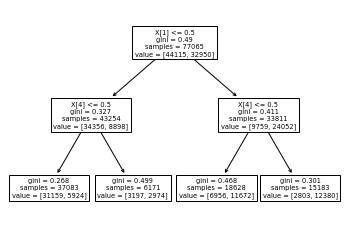

In [11]:
plot_tree(clf_small)

In [29]:
predicted = clf_small.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.731692604656774
Recall: 0.7131099353321576


----------------------

Dependency on maximal tree depth

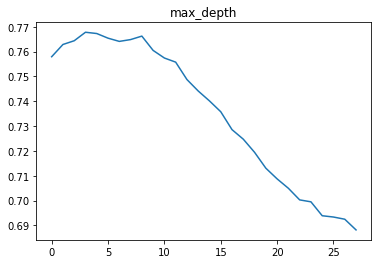

In [12]:
acc = []
for max_depth in range(2, 30):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
plt.plot(acc)
plt.title('max_depth')
plt.show()

--------------------

Dependency on min_samples_leaf parameter

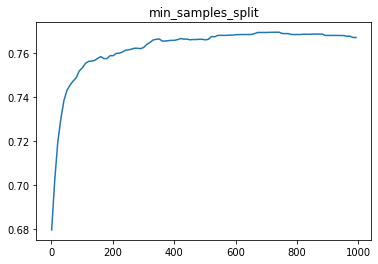

In [13]:
acc = []
values = range(2, 1000, 10)
for min_samples_split in values:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
plt.plot(values, acc)
plt.title('min_samples_split')
plt.show()

---------------------

In [14]:
clf_best = GridSearchCV(DecisionTreeClassifier(), {
    'min_samples_split': range(100, 350, 25),
    'min_samples_leaf': range(200, 1000, 80),
    'max_depth': range(2, 15),
})

In [15]:
start = time.time()
clf_best.fit(X_train, y_train)
print(time.time() - start)

1406.8236758708954


In [16]:
print('Train score:', clf_best.score(X_train, y_train))
print('Test score:', clf_best.score(X_test, y_test))

Train score: 0.7725815869720366
Test score: 0.7687237245030363


In [17]:
clf_best.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=200, min_samples_split=100)

In [28]:
predicted = clf_best.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.7411026661840994
Recall: 0.7267242399148232


-----------------------

In [18]:
clf_other_best = GridSearchCV(DecisionTreeClassifier(), {
    'min_samples_split': range(100, 350, 20),
    'min_samples_leaf': range(200, 1000, 50),
})

In [19]:
start = time.time()
clf_other_best.fit(X_train, y_train)
print(time.time() - start)

267.2479200363159


In [20]:
print('Train score:', clf_other_best.score(X_train, y_train))
print('Test score:', clf_other_best.score(X_test, y_test))

Train score: 0.7726983715045741
Test score: 0.7695022577464058


In [21]:
clf_other_best.best_estimator_

DecisionTreeClassifier(min_samples_leaf=250, min_samples_split=100)

In [22]:
clf_other_best.best_estimator_.

0.7685590086290793

In [27]:
predicted = clf_other_best.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.7354325009048136
Recall: 0.7305848513902206


In [39]:
clf_other_best.best_estimator_.tree_.max_depth

15

In [10]:
clf_the_best = DecisionTreeClassifier(min_samples_leaf=100, min_samples_split=100)
clf_the_best.fit(X_train, y_train)
print('Train score:', clf_the_best.score(X_train, y_train))
print('Test score:', clf_the_best.score(X_test, y_test))

Train score: 0.7763057159540647
Test score: 0.7695022577464058
